In [10]:
class Pentamer(object):
    def __init__(self):
        self.subunits.append(Subunit(0))
        self.subunits.append(Subunit(72))
        self.subunits.append(Subunit(144))
        self.subunits.append(Subunit(216))
        self.subunits.append(Subunit(288))
        
        self.trajectroy = []
        self.rand = 0.6
        
    @property
    def trajectory(self):
        return self._trajectory
    
    def run(self, step):
        for i in range(step):
            self.evolve()
            
    def evolve(self):
        probability = np.asarray([subunit[radius] for subunit in self.subunits])
        probal
        [subunit.update(prob, self.rand) for subunit, prob in zip(self.subunits, [probability,
                                                                                     np.roll(probability, -1),
                                                                                     np.roll(probability, -2),
                                                                                     np.roll(probability, -3),
                                                                                     np.roll(probability, -4)])]
        
        self.trajectory.append([subunit[radius] for subunit in self.subunits])
            
        
        
class Subunit(object):
    def __init__(self, angle):
        self.radius = 2
        self.angle = angle
        
    def update(self, prob, rand):
        sub_1 = prob[1] > 1
        sub_2 = prob[2] > 1
        sub_3 = prob[3] > 1
        sub_4 = prob[4] > 1
        
        if random.random() > rand:


In [1]:
import numpy as np
import pandas as pd
from random import seed
import random as rm
import matplotlib.pyplot as plt

In [223]:
class Dimer(object):
    def __init__(self, index):
        self.index = index
        self._trajectory_states = []
        self._state = self.states[0]
        
    def state_to_features(self):
        if self._state == "CC":
            return np.asarray([0.9, 0.1, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "OC":
            return np.asarray([0.1, 0.9, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "CO":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "OO":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.9, 0.6])            
        
    def run(self, step):
        self._trajectory = np.zeros([step, 6])
        
        # Init state CC
        self._state = self.states[0]
        self._trajectory_states.append(self.state) 
        self._trajectory[0] = self.state_to_features()
        
        for i in range(1, step):
            if i % 5 == 0:
                self.propagate()
                
            self._trajectory_states.append(self.state) 
            self._trajectory[i] = self.state_to_features()

            
        noise = np.random.normal(0, .01, self._trajectory.shape)
        self._trajectory = self._trajectory + noise

        
    @property
    def state(self):
        return self._state
    
    @property
    def trajectory(self):
        return self._trajectory
    
    @property
    def trajectory_states(self):
        return self._trajectory_states
    
    def propagate(self):
        state_ind = self.states.index(self.state)
        transition = np.random.choice(self.transitionName[state_ind],
                                      replace=True,
                                      p=self.transitionMatrix[state_ind])
        self._state = transition.split('_')[1]
        
    # The statespace
    states = ["CC","OC","CO", "OO"]
    
    single_states = ["C", "O"]


    # Possible sequences of events
    transitionName = [["CC_CC", "CC_OC", "CC_CO", "CC_OO"],
                      ["OC_CC","OC_OC","OC_CO", "OC_OO"],
                      ["CO_CC","CO_OC","CO_CO","CO_OO"],
                      ["OO_CC", "OO_OC", "OO_CO", "OO_OO"]]

    # Probabilities matrix (transition matrix)
    transitionMatrix = [[0.6, 0.2, 0.2, 0.0],
                        [0.1, 0.3, 0.0, 0.6],
                        [0.1, 0.0, 0.3, 0.6],
                        [0.0, 0.1, 0.1, 0.8]]

In [224]:
glic_dimer = Dimer(0)

In [225]:
glic_dimer.run(100000)

In [226]:
import pyemma

In [227]:
tica = pyemma.coordinates.tica([glic_dimer.trajectory], lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

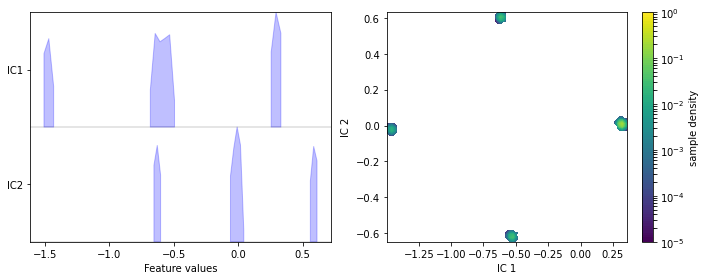

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=['IC1', "IC2"],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

In [230]:
import itertools

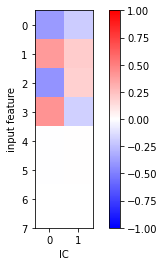

In [231]:
fig, ax = plt.subplots()
i = ax.imshow(np.array(sorted(tica.feature_TIC_correlation[:,:10],
                              key=lambda row: np.abs(row[1]), reverse=True))[:20,:],
              cmap='bwr', vmin=-1, vmax=1)

ax.set_xticks([0, 1])
ax.set_xlabel('IC')
ax.set_yticks(range(8))
#ax.set_yticklabels(feats)
ax.set_ylabel('input feature')

fig.colorbar(i);

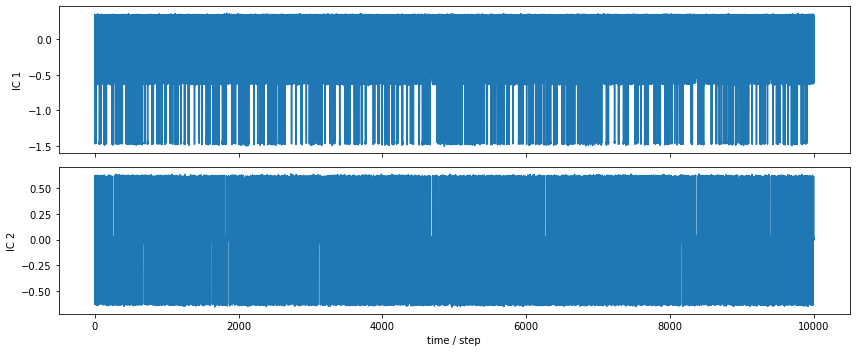

In [232]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / step')
fig.tight_layout()

In [236]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=4, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|          | 0/4 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

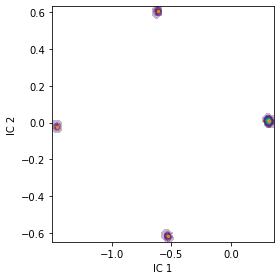

In [237]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

10-06-21 13:30:17 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[286] WARNING  Changed user setting nits to the number of available timescales nits=3


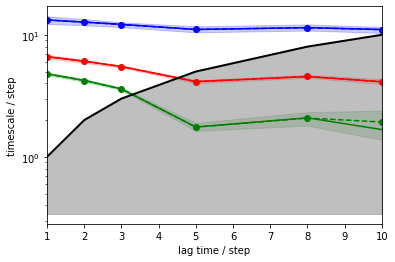

In [238]:
its = pyemma.msm.its(cluster.dtrajs, lags=10, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [239]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj='1 step')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[288]: compute stat. inefficiencies:   0%|          | 0/12 [00:0…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[288]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


estimating BayesianMSM:   0%|          | 0/4 [00:00<?, ?it/s]

/nethome/yzhuang/git_repo/PyEMMA/pyemma/util/statistics.py:59: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')


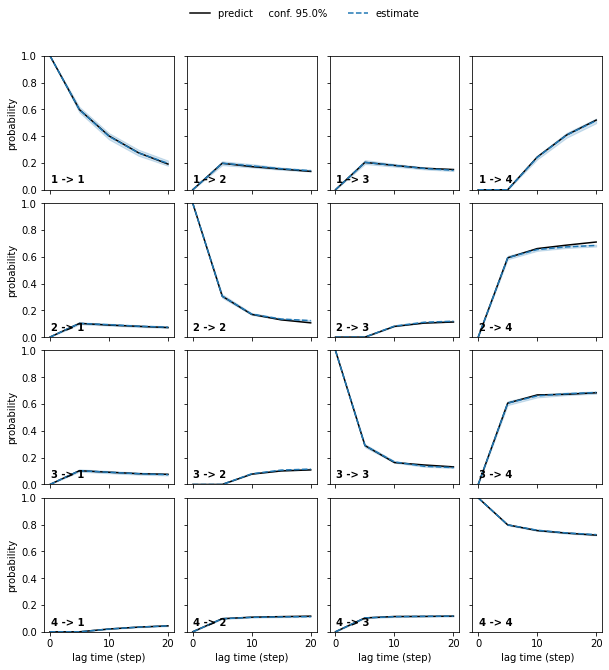

In [241]:
nstates = 4
cktest = msm.cktest(nstates, mlags=range(5))
pyemma.plots.plot_cktest(cktest, dt=1, units='step');

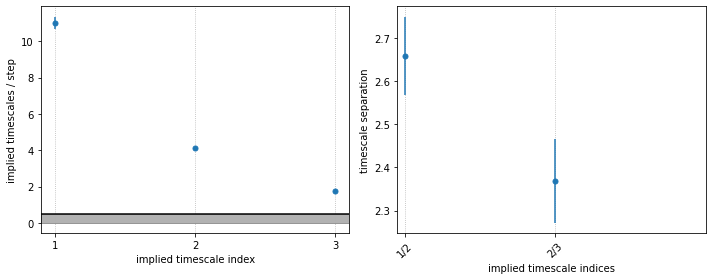

In [243]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 3

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / step')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 0)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()

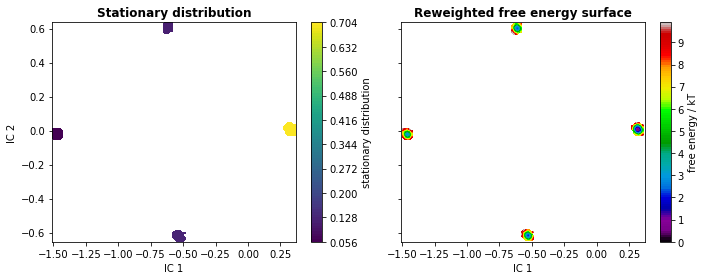

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

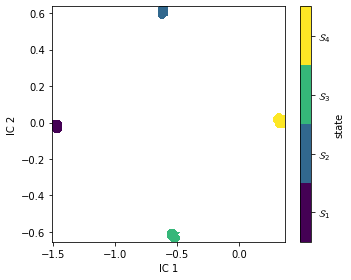

In [245]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [246]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [247]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

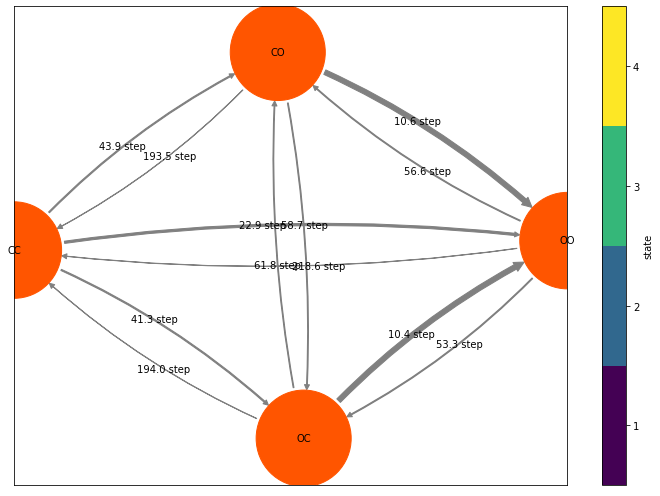

In [252]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f step',
    arrow_labels=mfpt,
    size=10,
    show_frame=True,
    state_labels=['CC','CO','OC','OO'],
    ax=ax)

fig.tight_layout()

In [278]:
msm.

[array([0]), array([1])]

In [253]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['CC','CO','OC','OO'], columns=['CC','CO','OC','OO'])

MFPT / steps:


,CC,CO,OC,OO
CC,0.00,43.86,41.31,22.90
CO,193.52,0.00,58.74,10.58
OC,194.04,61.81,0.00,10.35
OO,218.58,56.60,53.31,0.00


In [277]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['C', 'O'], columns=['C', 'O'])

MFPT / steps:


,C,O
C,0.00,10.76
O,49.47,0.00


In [279]:
mfpt_sample = np.zeros((nstates, nstates, bayesian_msm.nsamples))
for i in range(nstates):
    for j in range(nstates):
        mfpt_sample[i, j] = bayesian_msm.sample_f(
            'mfpt',
            msm.metastable_sets[i],
            msm.metastable_sets[j])

fig, ax = plt.subplots()
ax.hist(mfpt_sample[0, 1], histtype='step', label='MS 1 -> MS 2', density=True)
ax.hist(mfpt_sample[1, 0], histtype='step', label='MS 2 -> MS 1', density=True)
ax.set_xlabel('MFPT (steps)')
ax.set_title('Bayesian MFPT sample histograms')
fig.legend(loc=10);

NameError: name 'bayesian_msm' is not defined

## Subunit

In [254]:
glic_dimer.trajectory

array([[0.89439618, 0.08849405, 0.59857829, 0.9049225 , 0.09985856,
        0.6033563 ],
       [0.90487201, 0.09762263, 0.60449761, 0.90222024, 0.09109214,
        0.59547776],
       [0.90808731, 0.10788716, 0.58891038, 0.90966357, 0.08052237,
        0.5900976 ],
       ...,
       [0.10199322, 0.89962508, 0.59451371, 0.08978899, 0.9152029 ,
        0.60523105],
       [0.10976549, 0.91305264, 0.60700844, 0.11208471, 0.90757124,
        0.60003794],
       [0.09362985, 0.90547143, 0.57507605, 0.10995454, 0.89086369,
        0.60419578]])

In [255]:
tica = pyemma.coordinates.tica([glic_dimer.trajectory.T[:3].T, glic_dimer.trajectory.T[3:].T], lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

TypeError: plot_density() missing 1 required positional argument: 'yall'

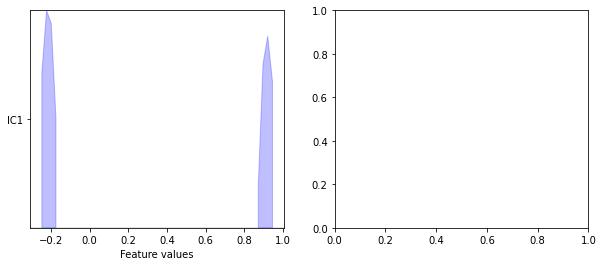

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=['IC1'],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

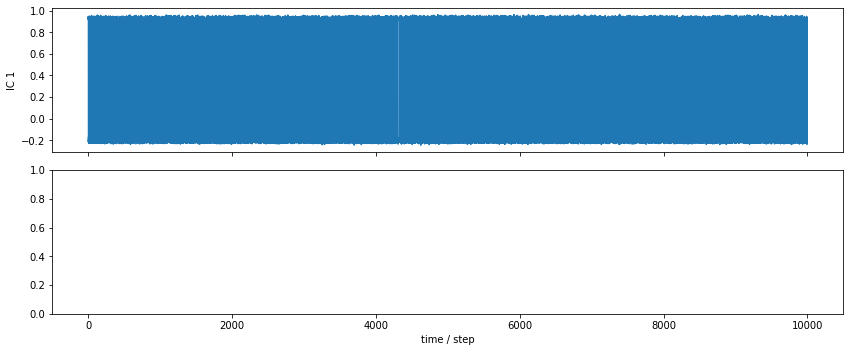

In [260]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / step')
fig.tight_layout()

In [262]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=2, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

TypeError: plot_density() missing 1 required positional argument: 'yall'

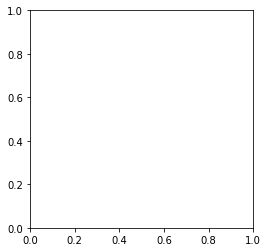

In [263]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

10-06-21 13:32:43 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[300] WARNING  Changed user setting nits to the number of available timescales nits=1


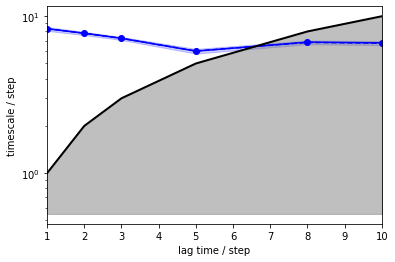

In [264]:
its = pyemma.msm.its(cluster.dtrajs, lags=10, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [265]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj='1 step')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[302]: compute stat. inefficiencies:   0%|          | 0/4 [00:00…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[302]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


estimating BayesianMSM:   0%|          | 0/4 [00:00<?, ?it/s]

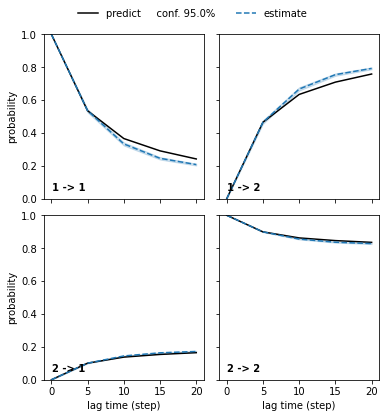

In [267]:
nstates = 2
cktest = msm.cktest(nstates, mlags=range(5))
pyemma.plots.plot_cktest(cktest, dt=1, units='step');

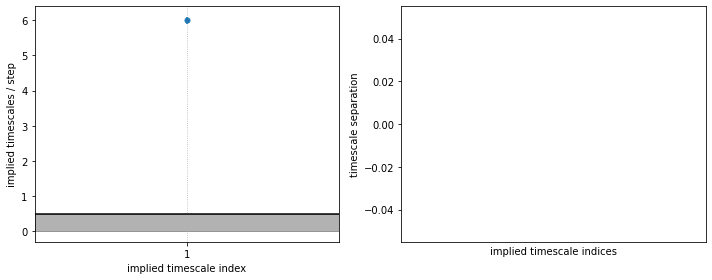

In [269]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 1

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / step')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 0)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()

TypeError: plot_contour() missing 1 required positional argument: 'zall'

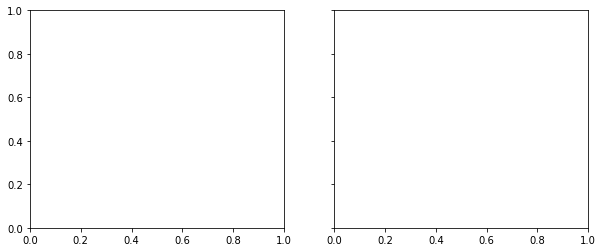

In [270]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

TypeError: plot_state_map() missing 1 required positional argument: 'states'

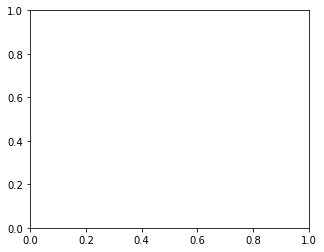

In [271]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [272]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [273]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

TypeError: plot_state_map() missing 1 required positional argument: 'states'

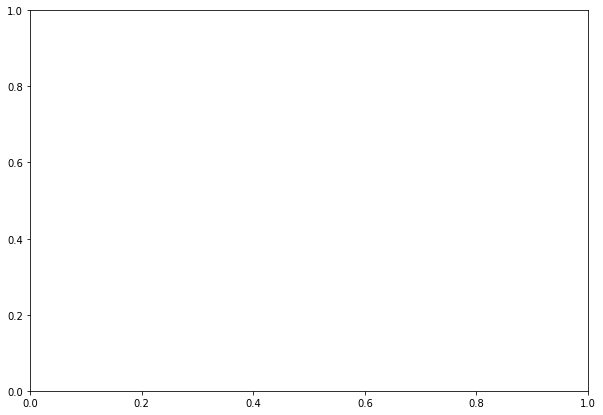

In [275]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f step',
    arrow_labels=mfpt,
    size=10,
    show_frame=True,
    state_labels=['Closed','Desensitized','Open'],
    ax=ax)

fig.tight_layout()

In [277]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['C', 'O'], columns=['C', 'O'])

MFPT / steps:


,C,O
C,0.00,10.76
O,49.47,0.00


In [111]:
class Dimer(object):
    def __init__(self, index):
        self.index = index
        self._trajectory_states = []
        self._state = self.states[0]
    
    def state_to_features(self):
        if self._state == "CC":
            return np.asarray([0.9, 0.1, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "OC":
            return np.asarray([0.1, 0.9, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "CO":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "OO":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "CD":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "OD":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "DC":
            return np.asarray([0.1, 0.4, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "DO":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "DD":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.4, 0.6])
            
        
    def run(self, step):
        self._trajectory = np.zeros([step, 6])
        
        # Init state CC
        self._state = self.states[0]
        self._trajectory_states.append(self.state) 
        self._trajectory[0] = self.state_to_features()
        
        for i in range(1, step):
            if i % 5 == 0:
                self.propagate()
                
            self._trajectory_states.append(self.state) 
            self._trajectory[i] = self.state_to_features()

            
        noise = np.random.normal(0, .01, self._trajectory.shape)
        self._trajectory = self._trajectory + noise
        
    @property
    def state(self):
        return self._state
    
    @property
    def trajectory(self):
        return self._trajectory
    
    @property
    def trajectory_states(self):
        return self._trajectory_states
    
    def propagate(self):
        state_ind = self.states.index(self.state)
        transition = np.random.choice(self.transitionName[state_ind],
                                      replace=True,
                                      p=self.transitionMatrix[state_ind])
        self._state = transition.split('_')[1]
        
    # The statespace
    states = ["CC","OC","CO", "OO", "CD", "OD", "DC", "DO", "DD"]
    
    single_states = ["C", "O", "D"]


    # Possible sequences of events
    transitionName = [["CC_CC", "CC_OC", "CC_CO", "CC_OO", "CC_CD", "CC_OD", "CC_DC", "CC_DO", "CC_DD"],
                      ["OC_CC", "OC_OC", "OC_CO", "OC_OO", "OC_CD", "OC_OD", "OC_DC", "OC_DO", "OC_DD"],
                      ["CO_CC", "CO_OC", "CO_CO", "CO_OO", "CO_CD", "CO_OD", "CO_DC", "CO_DO", "CO_DD"],
                      ["OO_CC", "OO_OC", "OO_CO", "OO_OO", "OO_CD", "OO_OD", "OO_DC", "OO_DO", "OO_DD"],
                      ["CD_CC", "CD_OC", "CD_CO", "CD_OO", "CD_CD", "CD_OD", "CD_DC", "CD_DO", "CD_DD"],
                      ["OD_CC", "OD_OC", "OD_CO", "OD_OO", "OD_CD", "OD_OD", "OD_DC", "OD_DO", "OD_DD"],
                      ["DC_CC", "DC_OC", "DC_CO", "DC_OO", "DC_CD", "DC_OD", "DC_DC", "DC_DO", "DC_DD"],
                      ["DO_CC", "DO_OC", "DO_CO", "DO_OO", "DO_CD", "DO_OD", "DO_DC", "DO_DO", "DO_DD"],
                      ["DD_CC", "DD_OC", "DD_CO", "DD_OO", "DD_CD", "DD_OD", "DD_DC", "DD_DO", "DD_DD"],
                     ]

    # Probabilities matrix (transition matrix)
    transitionMatrix = [[0.6, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #CC
                        [0.1, 0.3, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #OC
                        [0.1, 0.0, 0.3, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #CO
                        [0.0, 0.1, 0.1, 0.4, 0.0, 0.2, 0.0, 0.2, 0.0],  #OO
                        [0.2, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.4],  #CD
                        [0.0, 0.3, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.2],  #OD
                        [0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.4],  #DC
                        [0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.2, 0.2, 0.2],  #DO
                        [0.0, 0.0, 0.0, 0.0, 0.15, 0.1, 0.15, 0.1, 0.5] #DD
                       ]

In [112]:
glic_dimer = Dimer(0)

In [113]:
glic_dimer.run(100000)

In [154]:
import pyemma

In [177]:
tica = pyemma.coordinates.tica([glic_dimer.trajectory], lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

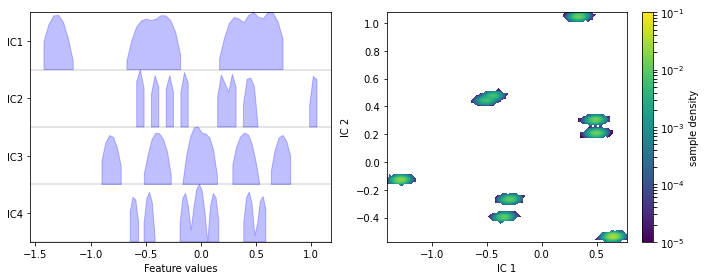

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=['IC1', "IC2", "IC3", "IC4"],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

In [179]:
import itertools

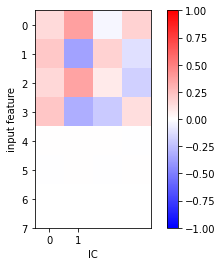

In [180]:
fig, ax = plt.subplots()
i = ax.imshow(np.array(sorted(tica.feature_TIC_correlation[:,:10],
                              key=lambda row: np.abs(row[1]), reverse=True))[:20,:],
              cmap='bwr', vmin=-1, vmax=1)

ax.set_xticks([0, 1])
ax.set_xlabel('IC')
ax.set_yticks(range(8))
#ax.set_yticklabels(feats)
ax.set_ylabel('input feature')

fig.colorbar(i);

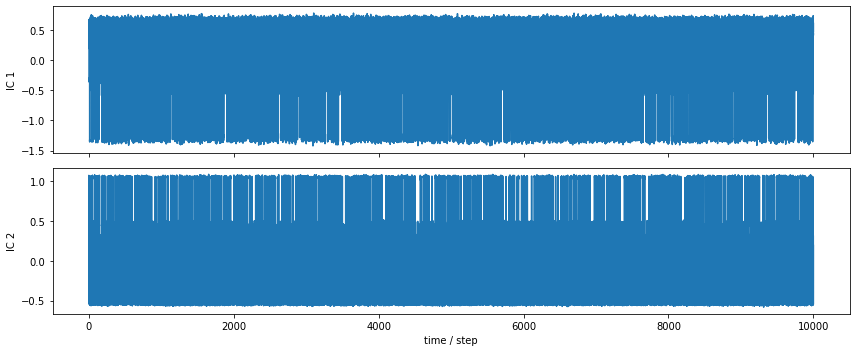

In [181]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / step')
fig.tight_layout()

In [160]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=9, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|          | 0/9 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

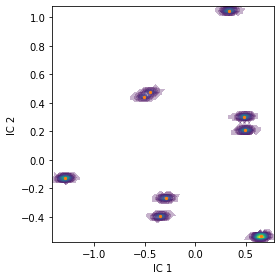

In [161]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

10-06-21 13:18:15 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[259] WARNING  Changed user setting nits to the number of available timescales nits=8


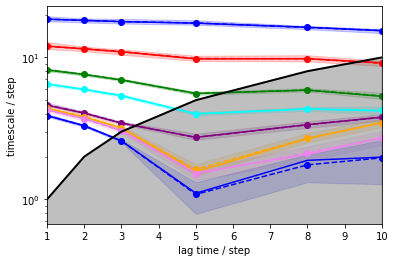

In [162]:
its = pyemma.msm.its(cluster.dtrajs, lags=10, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [163]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj='1 step')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[261]: compute stat. inefficiencies:   0%|          | 0/39 [00:0…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[261]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


estimating BayesianMSM:   0%|          | 0/4 [00:00<?, ?it/s]

/nethome/yzhuang/git_repo/PyEMMA/pyemma/util/statistics.py:59: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')


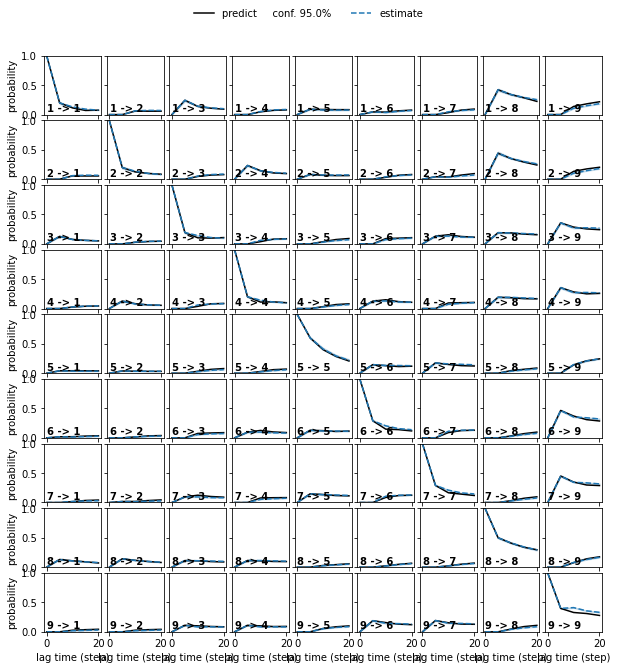

In [164]:
nstates = 9
cktest = msm.cktest(nstates, mlags=range(5))
pyemma.plots.plot_cktest(cktest, dt=1, units='step');

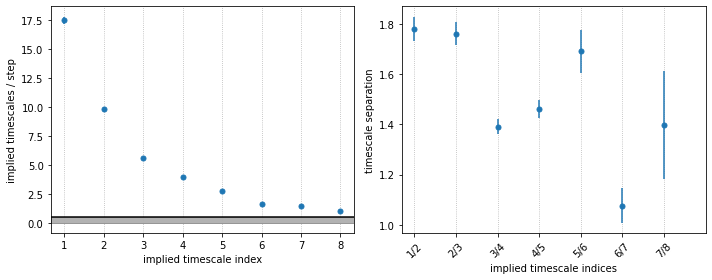

In [165]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 8

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / step')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 0)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()

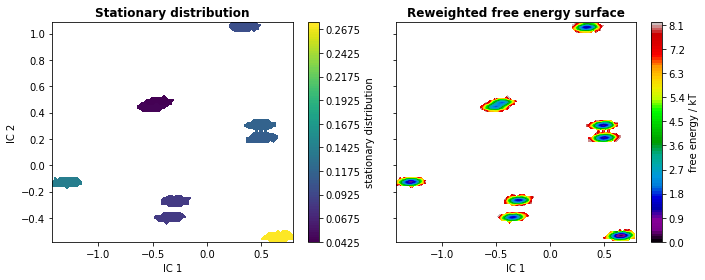

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

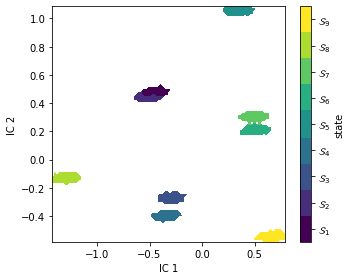

In [167]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [168]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [169]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

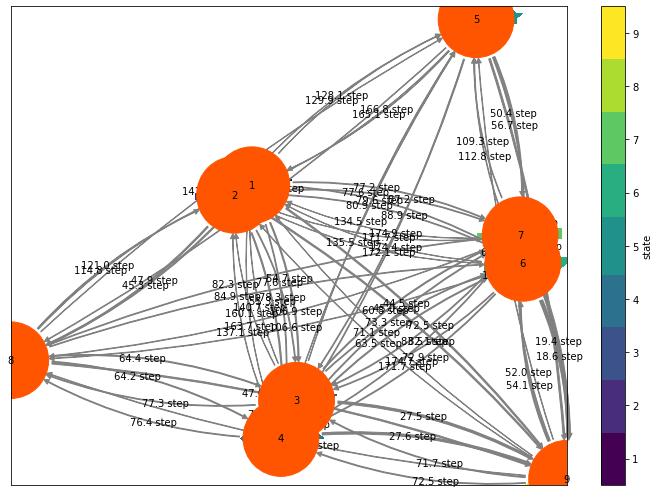

In [170]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f step',
    arrow_labels=mfpt,
    size=10,
    show_frame=True,
    state_labels=['1','2','3','4', '5', '6','7','8','9'],
    ax=ax)

fig.tight_layout()

In [172]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / steps:


,1,2,3,4,5,6,7,8,9
1,0.00,143.74,54.68,78.33,128.10,79.60,77.23,47.93,44.52
2,147.29,0.00,77.60,55.26,129.88,80.93,77.56,45.28,45.03
3,140.68,160.06,0.00,79.41,134.46,73.31,60.83,77.33,27.46
4,163.67,137.06,78.75,0.00,135.49,63.46,71.11,76.43,27.61
5,166.83,165.06,87.18,88.87,0.00,56.74,50.39,107.38,36.64
6,174.35,172.13,82.06,72.87,112.76,0.00,61.95,106.57,18.61
7,174.92,171.70,72.51,83.46,109.34,64.89,0.00,106.86,19.44
8,121.01,114.82,64.41,64.17,141.73,84.90,82.25,0.00,46.99
9,174.71,171.68,71.65,72.46,128.11,54.05,51.96,104.10,0.00


## Subunit

In [203]:
glic_dimer.trajectory

array([[0.90068154, 0.1041162 , 0.60413107, 0.89798534, 0.08987536,
        0.59931054],
       [0.91375792, 0.08888404, 0.6152215 , 0.90238873, 0.08994982,
        0.60726854],
       [0.89541847, 0.11215663, 0.60685348, 0.89844615, 0.09582687,
        0.60219973],
       ...,
       [0.10232318, 0.8908396 , 0.61089314, 0.89877691, 0.10214396,
        0.60265678],
       [0.10494212, 0.89708178, 0.59789879, 0.89114141, 0.11030093,
        0.57938139],
       [0.08647941, 0.88725339, 0.59331997, 0.88297722, 0.1109838 ,
        0.60251908]])

In [204]:
tica = pyemma.coordinates.tica([glic_dimer.trajectory.T[:3].T, glic_dimer.trajectory.T[3:].T], lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

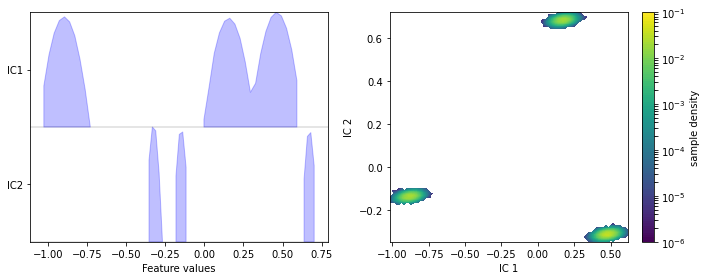

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=['IC1', 'IC2'],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()

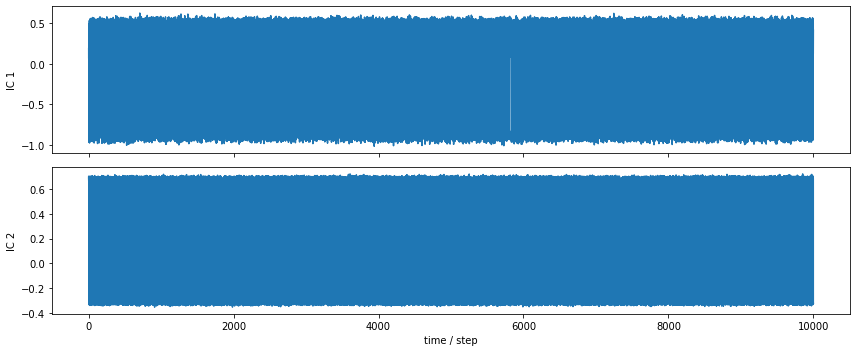

In [206]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / step')
fig.tight_layout()

In [207]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=3, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|          | 0/3 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

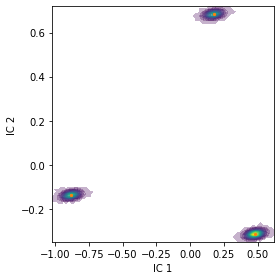

In [208]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

10-06-21 13:25:51 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[272] WARNING  Changed user setting nits to the number of available timescales nits=2


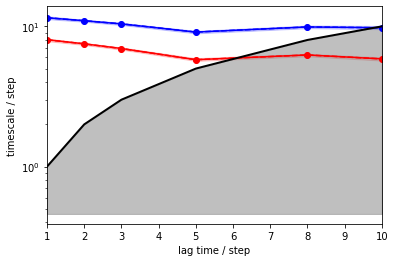

In [209]:
its = pyemma.msm.its(cluster.dtrajs, lags=10, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [210]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj='1 step')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[274]: compute stat. inefficiencies:   0%|          | 0/9 [00:00…

pyemma.msm.estimators.bayesian_msm.BayesianMSM[274]: Sampling MSMs:   0%|          | 0/100 [00:00<?, ?it/s]

fraction of states used = 1.00
fraction of counts used = 1.00


estimating BayesianMSM:   0%|          | 0/4 [00:00<?, ?it/s]

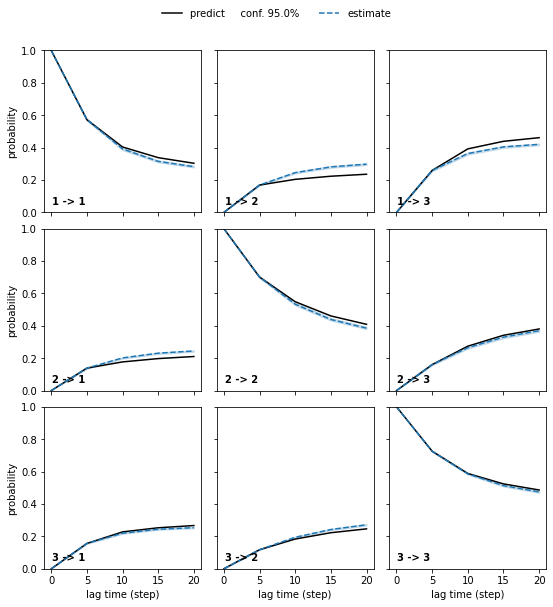

In [211]:
nstates = 3
cktest = msm.cktest(nstates, mlags=range(5))
pyemma.plots.plot_cktest(cktest, dt=1, units='step');

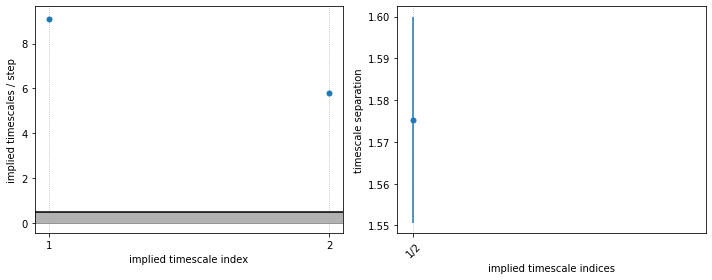

In [212]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 2

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean, 
    yerr=timescales_std, 
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:], 
    yerr=its_separation_err(
        timescales_mean, 
        timescales_std), 
    fmt='.', 
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')
    
axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / step')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 0)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()

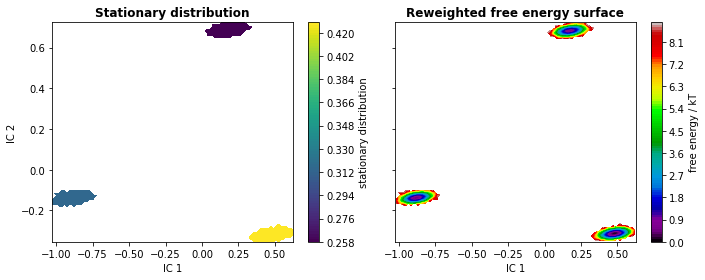

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

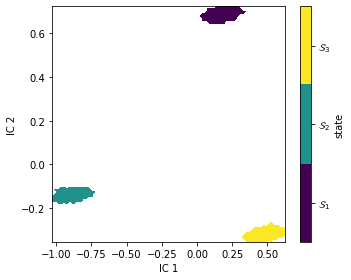

In [214]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [215]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]
highest_membership = msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster.clustercenters[msm.active_set[highest_membership]]

In [216]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

In [217]:
glic_dimer.trajectory_states[60]

'CO'

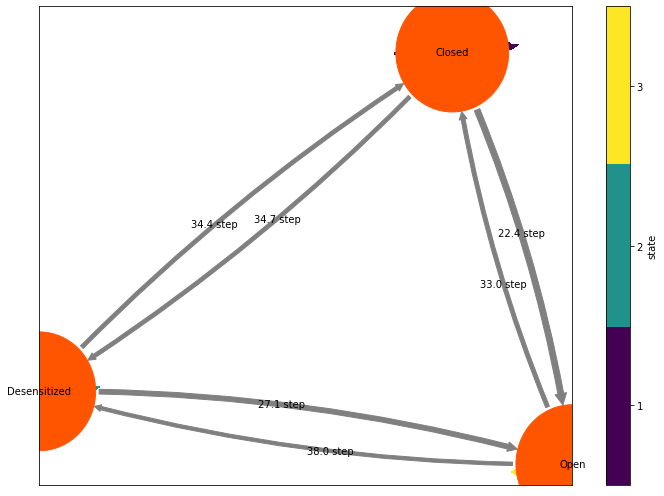

In [218]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f step',
    arrow_labels=mfpt,
    size=10,
    show_frame=True,
    state_labels=['Closed','Desensitized','Open'],
    ax=ax)

fig.tight_layout()

In [221]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['C', 'D', 'O'], columns=['C', 'D', 'O'])

MFPT / steps:


,C,D,O
C,0.0,34.72,22.37
D,34.4,0.00,27.08
O,33.0,38.03,0.00


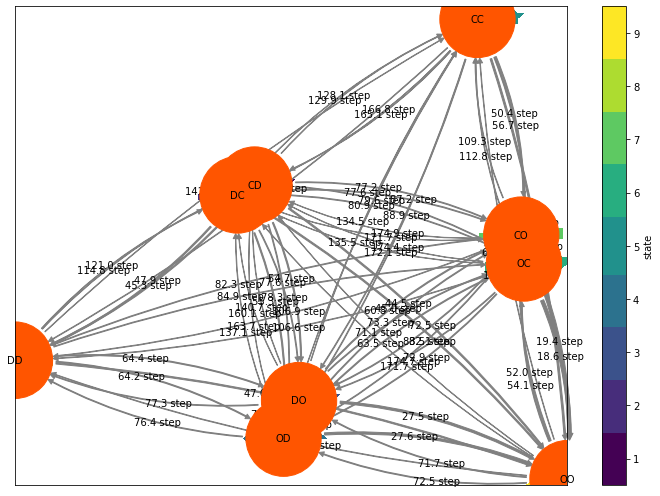

In [201]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax, zorder=-1)
misc['cbar'].set_ticklabels(range(1, nstates + 1))  # set state numbers 1 ... nstates

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.1f step',
    arrow_labels=mfpt,
    size=10,
    show_frame=True,
    state_labels=['CD','DC','DO','OD', 'CC', 'OC','CO','DD','OO'],
    ax=ax)

fig.tight_layout()

In [202]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['CD','DC','DO','OD', 'CC', 'OC','CO','DD','OO'], columns=['CD','DC','DO','OD', 'CC', 'OC','CO','DD','OO'])

MFPT / steps:


,CD,DC,DO,OD,CC,OC,CO,DD,OO
CD,0.00,143.74,54.68,78.33,128.10,79.60,77.23,47.93,44.52
DC,147.29,0.00,77.60,55.26,129.88,80.93,77.56,45.28,45.03
DO,140.68,160.06,0.00,79.41,134.46,73.31,60.83,77.33,27.46
OD,163.67,137.06,78.75,0.00,135.49,63.46,71.11,76.43,27.61
CC,166.83,165.06,87.18,88.87,0.00,56.74,50.39,107.38,36.64
OC,174.35,172.13,82.06,72.87,112.76,0.00,61.95,106.57,18.61
CO,174.92,171.70,72.51,83.46,109.34,64.89,0.00,106.86,19.44
DD,121.01,114.82,64.41,64.17,141.73,84.90,82.25,0.00,46.99
OO,174.71,171.68,71.65,72.46,128.11,54.05,51.96,104.10,0.00


In [222]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=['C', 'D', 'O'], columns=['C', 'D', 'O'])

MFPT / steps:


,C,D,O
C,0.0,34.72,22.37
D,34.4,0.00,27.08
O,33.0,38.03,0.00


In [48]:
class Dimer(object):
    def __init__(self, index):
        self.index = index
#        self._trajectory = []
        self._state = self.states[0]
        
    def run(self, step):
        self._trajectory = np.zeros([step, 4])
        for i in range(step):
            if i % 5 == 0:
                self.propagate()
            self._trajectory[i] = (np.asarray([
                                    self.single_states.index(self.state[0]),
                                    self.single_states.index(self.state[0]),
                                    self.single_states.index(self.state[1]),
                                    self.single_states.index(self.state[1]),
                                    ]))
            
        noise = np.random.normal(0, .1, self._trajectory.shape)
        self._trajectory = self._trajectory + noise
        
    @property
    def state(self):
        return self._state
    
    @property
    def trajectory(self):
        return self._trajectory
    
    
    def propagate(self):
        state_ind = self.states.index(self.state)
        transition = np.random.choice(self.transitionName[state_ind],
                                      replace=True,
                                      p=self.transitionMatrix[state_ind])
        self._state = transition.split('_')[1]
        
    # The statespace
    states = ["CCCC","OCCC","COCC", "CCOC", "CCCO",
              "OOCC", "OCOC", "OCCO","COOC",'COCO',"CCOO",
              "OOOC", "OOCO", "OCOO", "COOO", "OOOO"]
    
    single_states = ["CC","CO","OC", "OO"]


    # Possible sequences of events
    transitionName = [["_".join(stat) for stat in itertools.product([states_iter], states)] for states_iter in states]

    # Probabilities matrix (transition matrix)
    transitionMatrix = [[0.6, 0.2, 0.2, 0.0],
                        [0.1, 0.3, 0.0, 0.6],
                        [0.1, 0.0, 0.3, 0.6],
                        [0.0, 0.1, 0.1, 0.8]]

NameError: name 'states' is not defined